### DeepLearning - Deep Neural Network (TF + Keras)

#### Problem: Classiifcation 

In [1]:
# Dataset: Cancer dataset -- predict M, B 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
from tensorflow.keras import models                  # Sequential
from tensorflow.keras import layers                  # Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # ...

In [5]:
df = pd.read_csv('dl_datasets_1/cancer_classification.csv')

In [7]:
# df

In [8]:
# EDA

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [11]:
sc = MinMaxScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train.shape

(381, 30)

In [15]:
model = models.Sequential()

# Hidden layers
model.add(layers.Dense(units=30, activation='relu'))
model.add(layers.Dense(units=15, activation='relu'))

# Output layer 
model.add(layers.Dense(units=1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

In [18]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

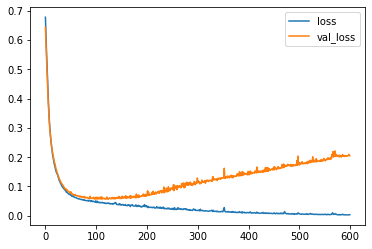

In [19]:
loss_df.plot()

In [20]:
model = models.Sequential()

# Hidden layers
model.add(layers.Dense(units=30, activation='relu'))
model.add(layers.Dense(units=15, activation='relu'))

# Output layer 
model.add(layers.Dense(units=1, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [28]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=early_stop, batch_size=32)

In [25]:
loss_df_2 = pd.DataFrame(model.history.history)

<AxesSubplot:>

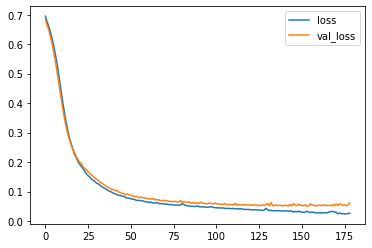

In [26]:
loss_df_2.plot()

In [29]:
model = models.Sequential()

# Hidden layers
model.add(layers.Dense(units=30, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=15, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer 
model.add(layers.Dense(units=1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=early_stop, batch_size=32)

In [34]:
loss_df_3 = pd.DataFrame(model.history.history)

<AxesSubplot:>

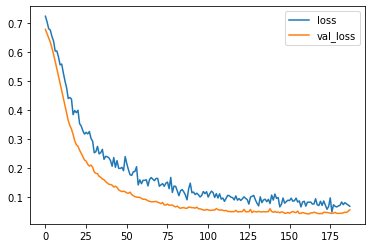

In [35]:
loss_df_3.plot()

In [36]:
training_loss = model.evaluate(X_train, y_train)
testing_loss = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0552


In [37]:
training_loss

0.0380590595304966

In [38]:
testing_loss

0.05520375818014145

In [50]:
test_prediction = model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [41]:
# y_test or true value 
# test_prediction or predict values

In [51]:
test_prediction.shape

(188, 1)

In [52]:
test_prediction = pd.Series(test_prediction.reshape(188,))

In [53]:
pred_data = pd.DataFrame(y_test, columns=['Y True value'])

In [54]:
pred_data = pd.concat([pred_data, test_prediction], axis=1)

In [57]:
pred_data.columns = ['Y True value', 'Y predicted value']

In [60]:
# sns.scatterplot(x=pred_data['Y True value'], y=pred_data['Y predicted value'])

In [61]:
# single vlaue prediction ...

In [64]:
# df

In [ ]:
sp = model.predict([])